In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
import pandas as pd
data = pd.read_csv("patients.csv")

In [3]:
data.head(5)

,id,first_name,last_name,patient_id,old_id,date_of_birth,sex,ethnicity,country,language,...,city,state,zipcode,phone_primary,phone_secondary,email,created_at,updated_at,other_language,other_country
0,1,Test,Salud a la Vista,AAA001,T01001,1980-12-12,F,HI,CE,SP,...,Milwaukee,WI,53226,414-955-2000,,,2018-01-02 16:14:16.498421+00:00,2018-01-02 16:14:16.498609+00:00,,
1,2,Jay,Test,AAA002,,1981-12-12,M,WH,CE,EN,...,Milwaukee,WI,53226,414-286-8000,414-286-9000,jt@gmail.com,2018-01-08 17:22:50.984490+00:00,2018-01-08 17:23:12.306540+00:00,,
2,3,Testy,Tester,AAA003,,1981-12-12,M,AS,US,EN,...,Milwaukee,WI,53212,4142223333,4142239456,ggg@hotmail.com,2018-01-16 14:55:07.237108+00:00,2018-01-16 19:59:48.990173+00:00,,
3,4,Noel,Sanchez,AAA004,,1970-01-23,M,HI,ME,SP,...,Milwaukee,WI,53204,414-218-2371,,,2018-01-17 21:49:38.900565+00:00,2018-01-17 21:49:38.900615+00:00,,
4,5,Rosa,Hernandez,AAA005,,1965-08-29,F,HI,ME,SP,...,Milwaukee,WI,53204,414-779-9226,,,2018-01-17 21:55:42.902499+00:00,2018-01-17 21:55:42.902543+00:00,,


In [4]:
#drop test inputs
data = data.drop(data[data['first_name' ].str.contains('Test')].index)
data = data.drop(data[data['first_name' ].str.contains('test2')].index)
data = data.drop(data[data['last_name' ].str.contains('Test')].index)
data.reset_index(drop=True,inplace=True)

In [5]:
data.drop(data.columns[[0, 1,2,4,11,12,13,14,15,16,17,18,19,20,22]], axis=1, inplace=True)

In [6]:
data.head()

,patient_id,date_of_birth,sex,ethnicity,country,language,insurance,other_language
0,AAA004,1970-01-23,M,HI,ME,SP,NO,
1,AAA005,1965-08-29,F,HI,ME,SP,NO,
2,AAA006,1996-07-16,M,BL,US,EN,NO,
3,AAA007,1970-01-28,M,BL,US,EN,NO,
4,AAA039,1953-07-11,M,WH,US,EN,IN,


In [7]:
# Gender Analysis
male = data[(data["sex"]=='M')]
female = data[(data["sex"]=='F')]

In [39]:
male.count()

patient_id        209
date_of_birth     209
sex               209
ethnicity         209
country           209
language          209
insurance         209
other_language    209
dtype: int64

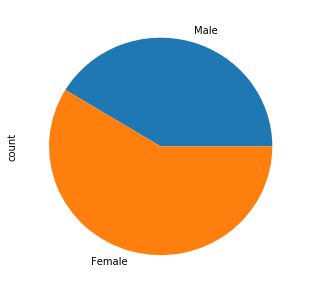

In [17]:
sex_data = pd.DataFrame({'count': [male.shape[0], female.shape[0]]}, index=['Male', 'Female'])
sex_data.plot.pie(y='count', figsize=(5, 5), legend=False)

In [18]:
# Analyzing Ethnicity
hispanic = data[(data["ethnicity"]=='HI')]
white = data[(data["ethnicity"]=='WH')]
black = data[(data["ethnicity"]=='BL')]
native = data[(data["ethnicity"]=='NA')]
asian = data[(data["ethnicity"]=='AS')]
other = data[(data["ethnicity"]=='OT')]

In [49]:
#black.count()/496*100
other.count()/496*100

patient_id        12.096774
date_of_birth     12.096774
sex               12.096774
ethnicity         12.096774
country           12.096774
language          12.096774
insurance         12.096774
other_language    12.096774
age               12.096774
dtype: float64

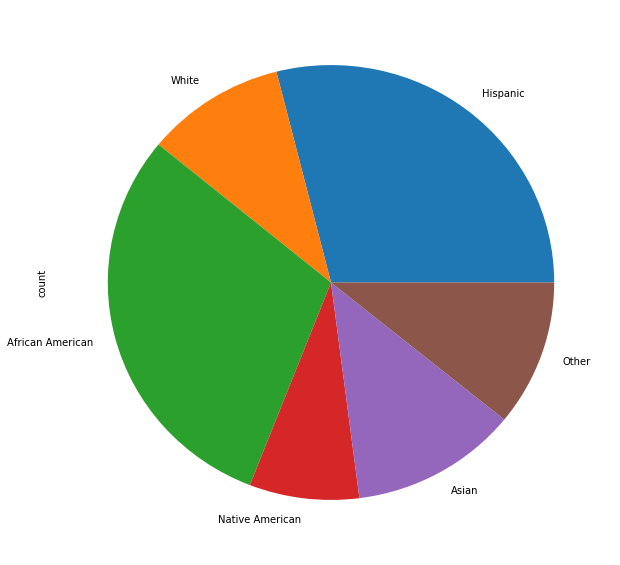

In [43]:
pd.DataFrame({'count': [hispanic.shape[0], white.shape[0],black.shape[0],native.shape[0],asian.shape[0],other.shape[0]]}, index=['Hispanic', 'White','African American','Native American','Asian','Other']).plot.pie(y='count', figsize=(10,10), legend=False)

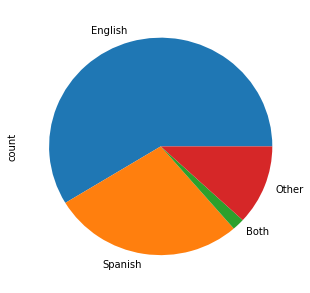

In [22]:
# # Language
english = data[(data["language"]=='EN')]
spanish = data[(data["language"]=='SP')]
both = data[(data["language"]=='BT')]
other = data[(data["language"]=='OT')]
pd.DataFrame({'count': [english.shape[0], spanish.shape[0],both.shape[0],other.shape[0]]}, index=['English', 'Spanish','Both','Other']).plot.pie(y='count', figsize=(5,5), legend=False)

In [54]:
other.count()/496*100

patient_id        12.096774
date_of_birth     12.096774
sex               12.096774
ethnicity         12.096774
country           12.096774
language          12.096774
insurance         12.096774
other_language    12.096774
age               12.096774
dtype: float64

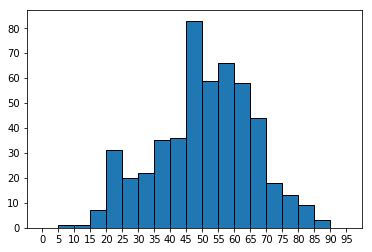

In [12]:
# Age distribution
from datetime import datetime
from dateutil.parser import parse
old=0
for i in range(0,data['date_of_birth'].count()):
    data['date_of_birth'][i] = datetime.strptime(str(data['date_of_birth'][i]), '%Y-%m-%d')
    data["date_of_birth"][i] = pd.to_datetime('today').year - pd.to_datetime(data['date_of_birth'][i]).year
data['age']= data['date_of_birth'].astype(int)

bins = [x*5 for x in range(0, 20)] # results in 15, 20, ... 85, 90
plt.hist(data['age'], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.show()

In [23]:
# Insurance Status
medicare = data[(data["insurance"]=='ME')]
medicaid = data[(data["insurance"]=='MD')]
medicare_medicaid = data[(data["insurance"]=='MM')]
private = data[(data["insurance"]=='PR')]
other_insurance = data[(data["insurance"]=='OT')]
no_insurance = data[(data["insurance"]=='NO')]

In [59]:
private.count()/496*100

patient_id        21.169355
date_of_birth     21.169355
sex               21.169355
ethnicity         21.169355
country           21.169355
language          21.169355
insurance         21.169355
other_language    21.169355
age               21.169355
dtype: float64

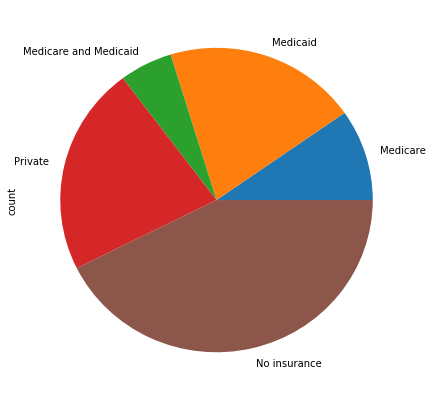

In [24]:
pd.DataFrame({'count': [medicare.shape[0], medicaid.shape[0],medicare_medicaid.shape[0],private.shape[0],other_insurance.shape[0],no_insurance.shape[0]]}, index=['Medicare', 'Medicaid','Medicare and Medicaid','Private','Other','No insurance']).plot.pie(y='count', figsize=(7,7), legend=False)
